# Comparison of Models

Throughout our modelling, we explored several performance metrics. Since the data was unbalanced, we used the ROC curve instead of the accuracy. This is because the ROC curve illustrates the tradeoff between the sensitivity and specificity and this was of greater importance in the unbalanced setting.


REMEMBER (FROM ASSESSMENT GUIDANCE:)
Half of the effort should be devoted to exploring appropriate performance
measures. Think about the circumstances by which your chosen performance
metric will lead to real-world generalisability, and how it might compromise
this for the purpose of standardization. Demonstrate this with data and/or
simulation; for example, if you believe that you can predict new types of data,
you could demonstrate this by leaving out some types of data and observing
your performance. Examine in what sense your group’s best method is truly
best.

Checklist:
- Explore performance measures - CHECK because we have all done this - looking at ROC curves, confusion matrices etc
- Demonstrate generalisability with data - CHECK because we have all done this. We found predictions on the test set and found the ROC curve.
- Examine in what sense your group's best method is the best - IN PROGRESS. I have gotten a start on this by loading the LDA and RF results. I have plotted the predictions. We still need logistic, and after that we can do a write-up. We should also do a discussion on each of our methods. Perhaps we provide a condensed version of our individual discussions (5.4 and 4.3 condensed here?)


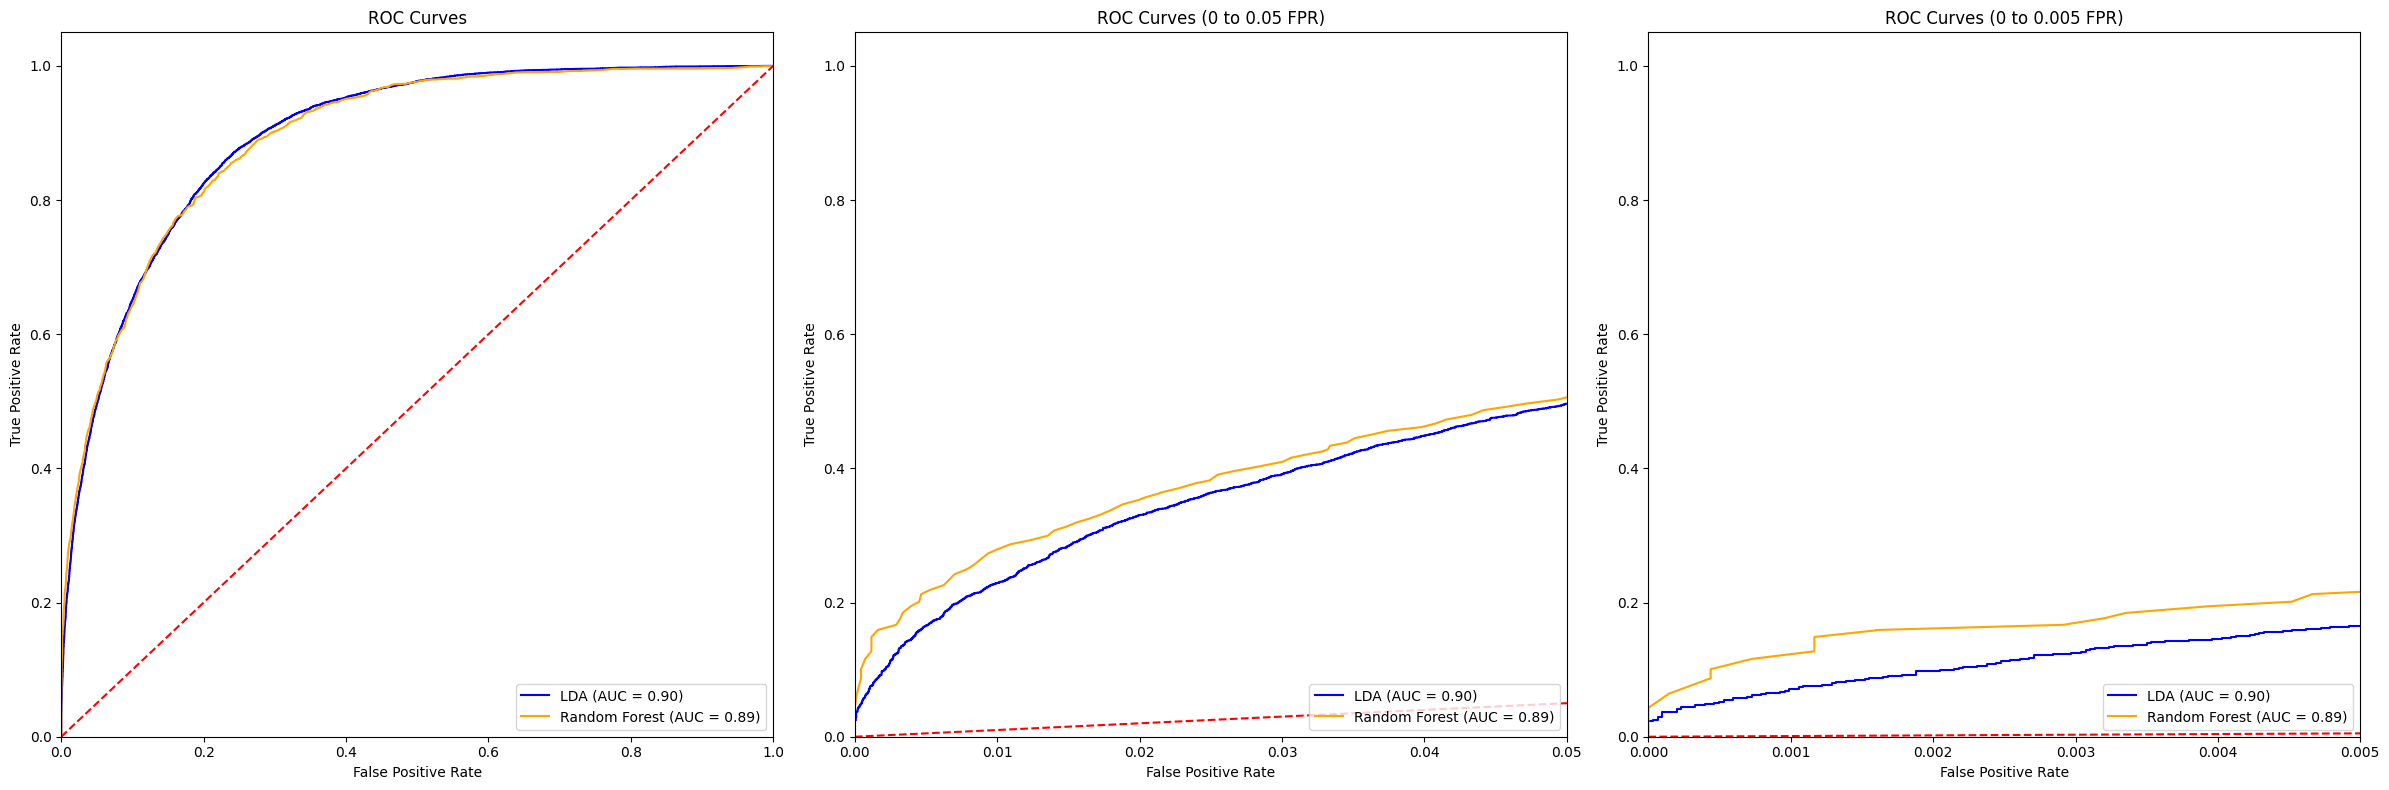

In [5]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Load LDA ROC data
with open("pickle/LDA_roc_data.pkl", 'rb') as file:
    lda_roc_data = pickle.load(file)

# Load RF ROC data
with open("pickle/rf_roc_data.pkl", 'rb') as file:
    rf_roc_data = pickle.load(file)

# Create subplots: full range, small range (0-0.05), very small range (0-0.005)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Plot the full-range ROC curve
ax1.plot(lda_roc_data['fpr_lda'], lda_roc_data['tpr_lda'], color='blue', 
         label=f'LDA (AUC = {lda_roc_data["roc_auc_lda"]:.2f})')
ax1.plot(rf_roc_data['fpr'], rf_roc_data['tpr'], color='orange', 
         label=f'Random Forest (AUC = {rf_roc_data["roc_auc"]:.2f})')
ax1.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing diagonal
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves')
ax1.legend(loc='lower right')
ax1.grid(False)

# Plot the ROC curve with x-axis range 0 to 0.05
ax2.plot(lda_roc_data['fpr_lda'], lda_roc_data['tpr_lda'], color='blue', 
         label=f'LDA (AUC = {lda_roc_data["roc_auc_lda"]:.2f})')
ax2.plot(rf_roc_data['fpr'], rf_roc_data['tpr'], color='orange', 
         label=f'Random Forest (AUC = {rf_roc_data["roc_auc"]:.2f})')
ax2.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing diagonal
ax2.set_xlim([0.0, 0.05])  # Zoom in on small x-axis values (0 to 0.05)
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curves (0 to 0.05 FPR)')
ax2.legend(loc='lower right')
ax2.grid(False)

# Plot the ROC curve with x-axis range 0 to 0.005
ax3.plot(lda_roc_data['fpr_lda'], lda_roc_data['tpr_lda'], color='blue', 
         label=f'LDA (AUC = {lda_roc_data["roc_auc_lda"]:.2f})')
ax3.plot(rf_roc_data['fpr'], rf_roc_data['tpr'], color='orange', 
         label=f'Random Forest (AUC = {rf_roc_data["roc_auc"]:.2f})')
ax3.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing diagonal
ax3.set_xlim([0.0, 0.005])  # Zoom in on very small x-axis values (0 to 0.005)
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves (0 to 0.005 FPR)')
ax3.legend(loc='lower right')
ax3.grid(False)

# Show the plots
plt.tight_layout()
plt.show()


We see that LDA has a higher ROC than the random forest. To inspect our chosen question of looking at the variation of income by sex, we look at the actual and predicted income by sex. 

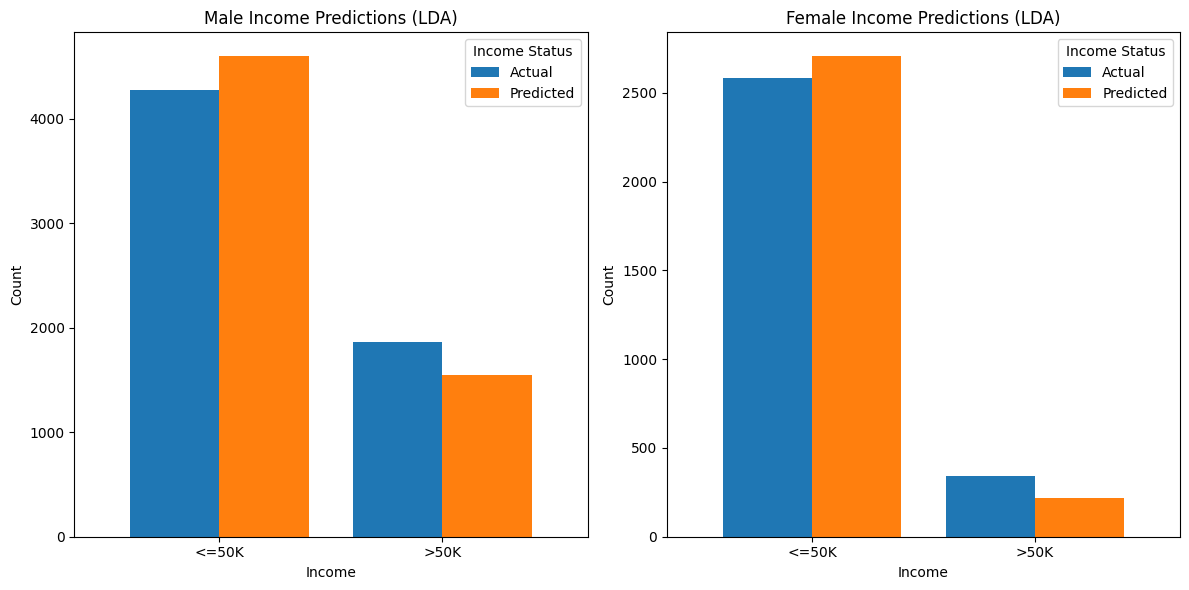

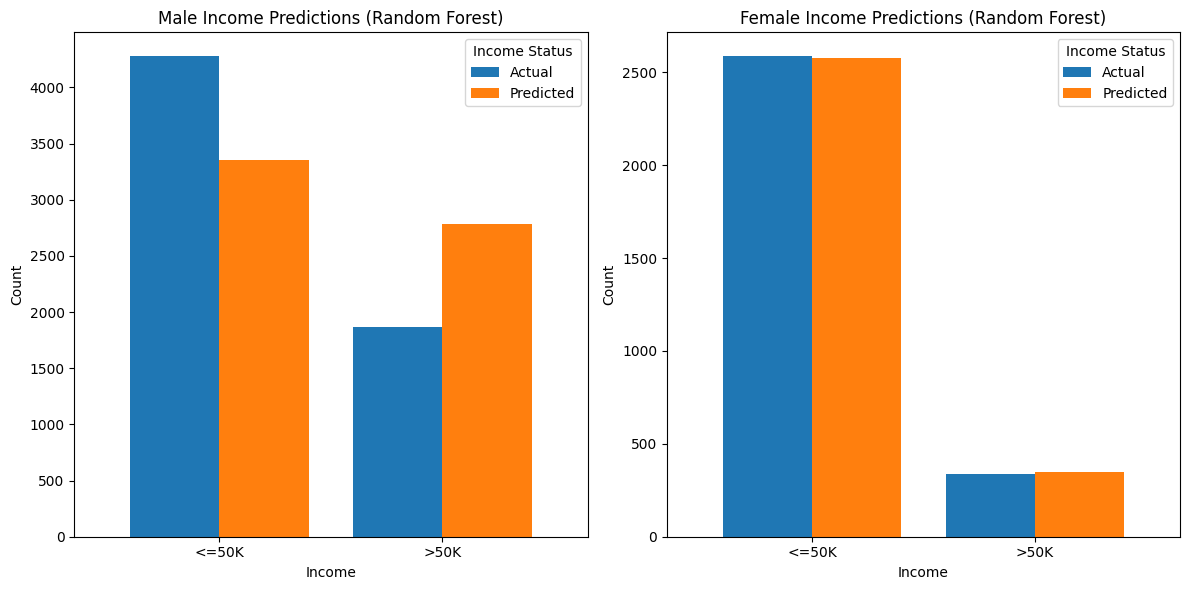

In [4]:
def plot_income_predictions(results_df, model_name):
    # Filter for males and females
    male_df = results_df[results_df['Sex'] == 'Male']
    female_df = results_df[results_df['Sex'] == 'Female']

    # Count occurrences for males
    male_actual_counts = male_df['Actual Income'].value_counts()
    male_predicted_counts = male_df['Predicted Income'].value_counts()

    # Count occurrences for females
    female_actual_counts = female_df['Actual Income'].value_counts()
    female_predicted_counts = female_df['Predicted Income'].value_counts()

    # Create a DataFrame to hold counts for males
    male_income_counts = pd.DataFrame({
        'Actual': male_actual_counts,
        'Predicted': male_predicted_counts
    }).fillna(0)

    # Create a DataFrame to hold counts for females
    female_income_counts = pd.DataFrame({
        'Actual': female_actual_counts,
        'Predicted': female_predicted_counts
    }).fillna(0)

    # Create side-by-side bar plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Male plot
    male_income_counts.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'], width=0.8)
    axes[0].set_title(f'Male Income Predictions ({model_name})')
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel('Income')
    axes[0].set_xticklabels(male_income_counts.index, rotation=0)
    axes[0].legend(title='Income Status', loc='upper right')

    # Female plot
    female_income_counts.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'], width=0.8)
    axes[1].set_title(f'Female Income Predictions ({model_name})')
    axes[1].set_ylabel('Count')
    axes[1].set_xlabel('Income')
    axes[1].set_xticklabels(female_income_counts.index, rotation=0)
    axes[1].legend(title='Income Status', loc='upper right')

    plt.tight_layout()
    plt.show()

# Usage for results_df_lda.pkl
with open('pickle/results_df_lda.pkl', 'rb') as f:
    results_df_lda = pickle.load(f)
plot_income_predictions(results_df_lda, 'LDA')

# Usage for results_df_rf.pkl
with open('pickle/results_df_rf.pkl', 'rb') as f:
    results_df_rf = pickle.load(f)
plot_income_predictions(results_df_rf, 'Random Forest')
